# Estimate multivariate time series models on real world data

We will use a VAR model to predict the value of Luxembourg stock market index (LUXX). 'DAX_CAC_BEL_LUXX.xlsx' contains daily data for DAX (Frankfurt stock exchange, 40 blue chip companies), CAC (Paris stock exchange, 40), BEL (Brussels stock exchange, 20) and LUXX (Luxembourg stock exchange, 9 assets) stock market indexes. Sample runs from 1990-2022june, with missing values. We will simplify our task by estimating a VAR(2). That is, from the 3 potential exogenous predictors (DAX, CAC, BEL) we will select one to be included next to LUXX. This is a very tricky example. Luxx stock index is peculiar. It does not seem to be trending, like other stock indices and is very illiquid. We go over this example to see that modelling in practice can be a messy business.

Note: we neglect treatment of outliers, holiday day effects,...

Ex. 1 
1. Import data and plot them.   
2. Perform stationarity tests and decide if data should be differenced or in levels. 
3. Calculate correlations between LUXX and the remaining 3 stock indices. Which of the series is the most promising? 
4. Estimate a VAR on the two selected series. Estimation sample: up to 2021, forecast sample: Jan-June. 
5. Perform a rolling 1-step ahead forecast and plot. 
6. Perform cointegration tests. If cointegration is detected, estimate the model in levels and perform the same forecasts. [SKIP]  


Comment on the figures. Do indexes look stationary? Can you detect common patterns by eyeballing the figures?


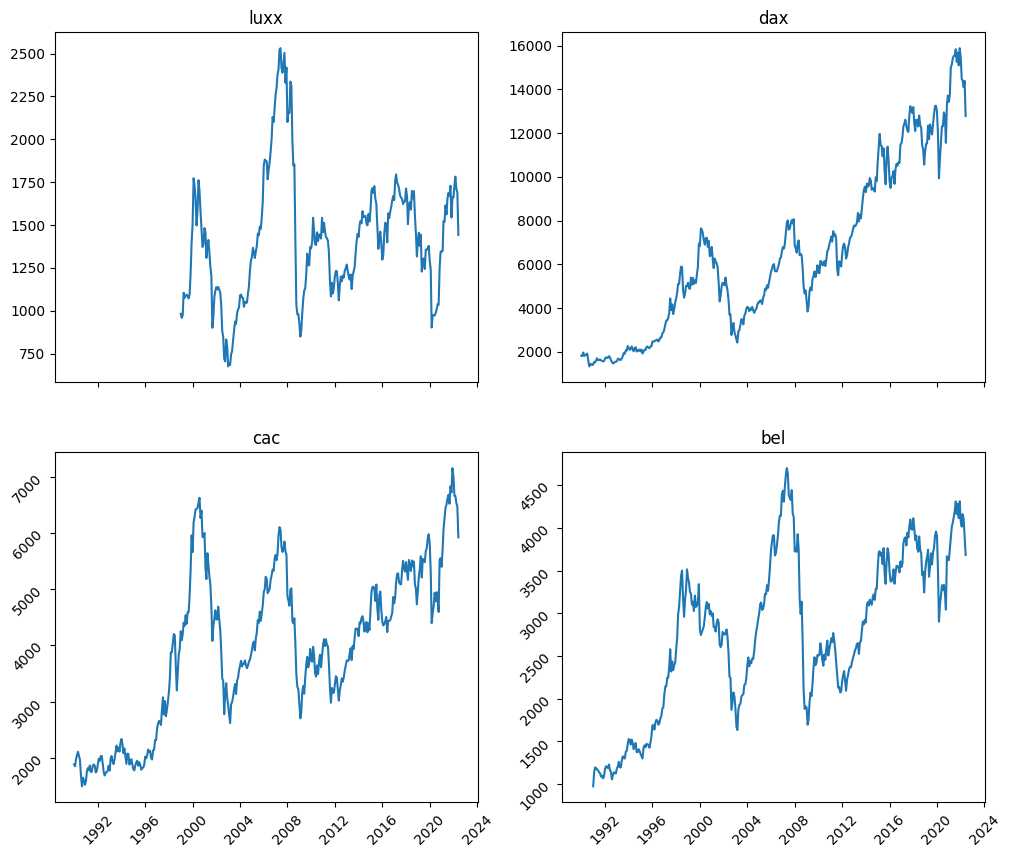

In [1]:
# Ex 1 Import data and plot them
# install required by using (ex.): pip install openpyxl
# initialize packages
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

# import 
df = pd.read_excel('DAX_CAC_BEL_LUXX.xlsx')                              # import excel file data
df.columns = ['date', 'dax','bel','luxx','cac']                          # rename columns 
df = df.iloc[3: , :]                                                     # drop 1st 2 rows
df["date"] = pd.to_datetime(df["date"]).dt.date

# plot data
fig, axs = plt.subplots(2,2, sharex=True,figsize=(12,10))
axs[0,0].plot(df['date'], df['luxx']);
axs[0,0].set_title('luxx');
axs[0,1].plot(df['date'], df['dax']);
axs[0,1].set_title("dax");
axs[1,0].plot(df['date'], df['cac']);
axs[1,0].set_title("cac");
axs[1,1].plot(df['date'], df['bel']);
axs[1,1].set_title("bel");
axs[1,0].tick_params(labelrotation=45)
axs[1,1].tick_params(labelrotation=45)
print("Comment on the figures. Do indexes look stationary? Can you detect common patterns by eyeballing the figures?")


From the looks of AC and PAC all indexes, except luxx, are clearly non-stationary (very persistent AC function, PAC cuts off at lag 1). Luxx AC function is less persistent so it could be either stationary or non-stationary.


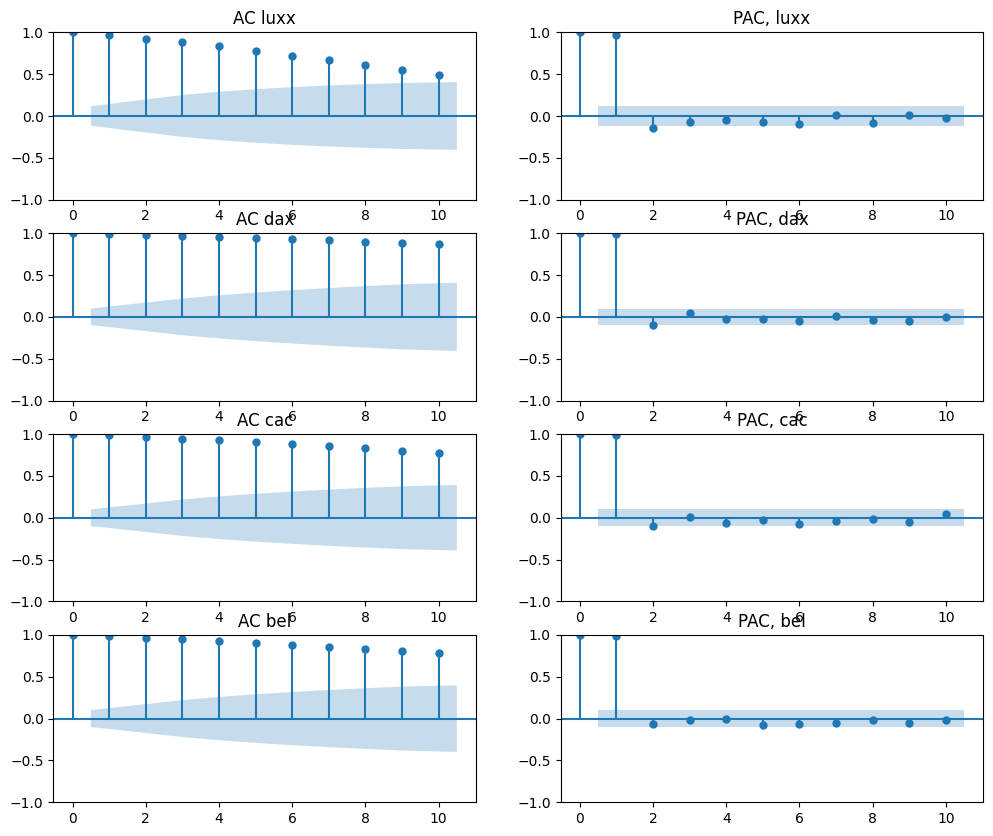

In [2]:
# Ex 2 stationarity
# plot AC and PAC functions
fig, axs = plt.subplots(4, 2,figsize=(12,10))
# luxx
sm.graphics.tsa.plot_acf(df["luxx"].dropna(), lags=10, ax=axs[0,0]);
axs[0,0].set_title("AC luxx");
sm.graphics.tsa.plot_pacf(df["luxx"].dropna(), lags=10, ax=axs[0,1]);
axs[0,1].set_title("PAC, luxx");
# dax
sm.graphics.tsa.plot_acf(df["dax"].dropna(), lags=10, ax=axs[1,0]);
axs[1,0].set_title("AC dax");
sm.graphics.tsa.plot_pacf(df["dax"].dropna(), lags=10, ax=axs[1,1]);
axs[1,1].set_title("PAC, dax");
# cac
sm.graphics.tsa.plot_acf(df["cac"].dropna(), lags=10, ax=axs[2,0]);
axs[2,0].set_title("AC cac");
sm.graphics.tsa.plot_pacf(df["cac"].dropna(), lags=10, ax=axs[2,1]);
axs[2,1].set_title("PAC, cac");
# bel
sm.graphics.tsa.plot_acf(df["bel"].dropna(), lags=10, ax=axs[3,0]);
axs[3,0].set_title("AC bel");
sm.graphics.tsa.plot_pacf(df["bel"].dropna(), lags=10, ax=axs[3,1]);
axs[3,1].set_title("PAC, bel");

print("From the looks of AC and PAC all indexes, except luxx, are clearly non-stationary (very persistent AC function, PAC cuts off at lag 1). Luxx AC function is less persistent so it could be either stationary or non-stationary.")


In [14]:
# Ex 2 stationarity
# Stationarity tests - table with probabilities for each test
ur_probs = pd.DataFrame(np.zeros((4,2)))
ur_probs.index = ['dax','bel','luxx','cac']
ur_probs.columns = ['adf','kpss']

# tests
for i in range(1, df.shape[1]):
    # YOUR CODE HERE
    x = df.iloc[:, i].dropna()
    res = sm.tsa.stattools.adfuller(x=x, maxlag=13, regression="c", autolag="BIC");
    ur_probs.iloc[i-1,0] = res[1]
    # YOUR CODE HERE
    res = sm.tsa.stattools.kpss(x=x, regression="c", nlags="auto")
    ur_probs.iloc[i-1,1] = res[1]

display("Table with p-values for ADF (H0:series is UR) and KPSS (H0:series is stat)")
print(ur_probs)

C:\Users\Ant\AppData\Local\Temp\ipykernel_21404\4056383096.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = sm.tsa.stattools.kpss(x=x, regression="c", nlags="auto")
C:\Users\Ant\AppData\Local\Temp\ipykernel_21404\4056383096.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = sm.tsa.stattools.kpss(x=x, regression="c", nlags="auto")
C:\Users\Ant\AppData\Local\Temp\ipykernel_21404\4056383096.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res = sm.tsa.stattools.kpss(x=x, regression="c", nlags="auto")
C:\Users\Ant\AppData\Local\Temp\ipykernel_21404\4056383096.py:14: InterpolationWarning: The test statistic

'Table with p-values for ADF (H0:series is UR) and KPSS (H0:series is stat)'

           adf  kpss
dax   0.839999  0.01
bel   0.324540  0.01
luxx  0.186812  0.10
cac   0.527682  0.01


Comment on the figures. Do indexes look stationary? Can you detect common patterns by eyeballing the figures?
All series appear stationary.


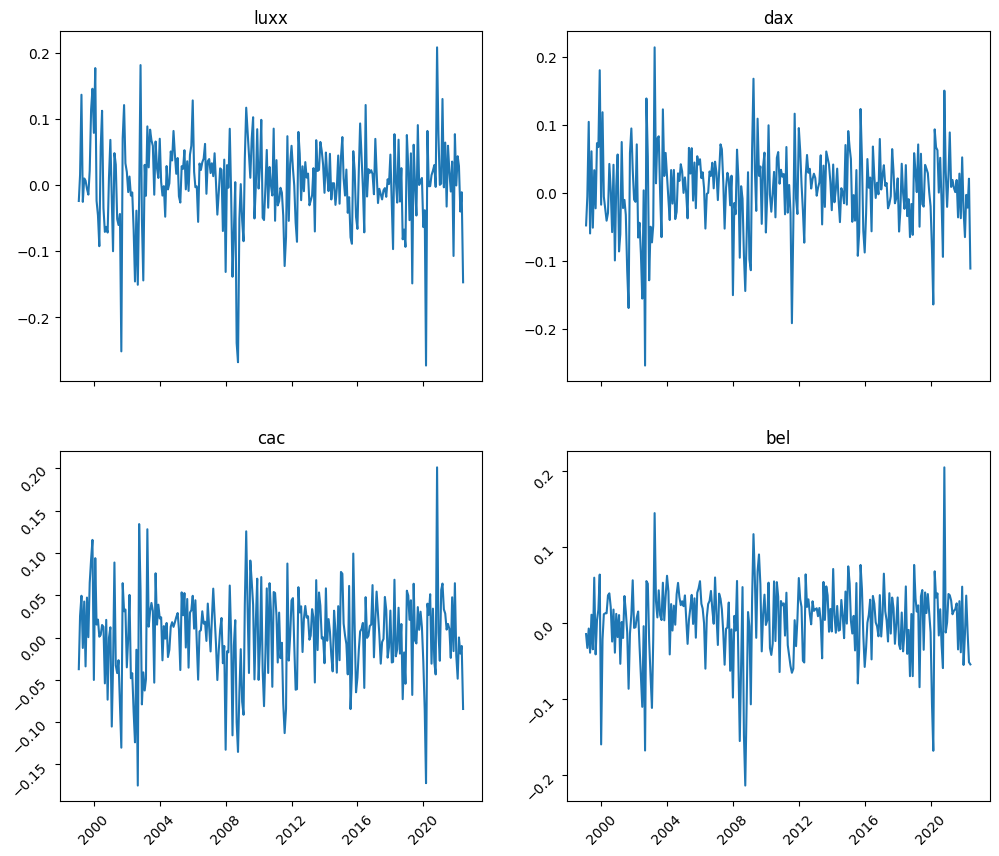

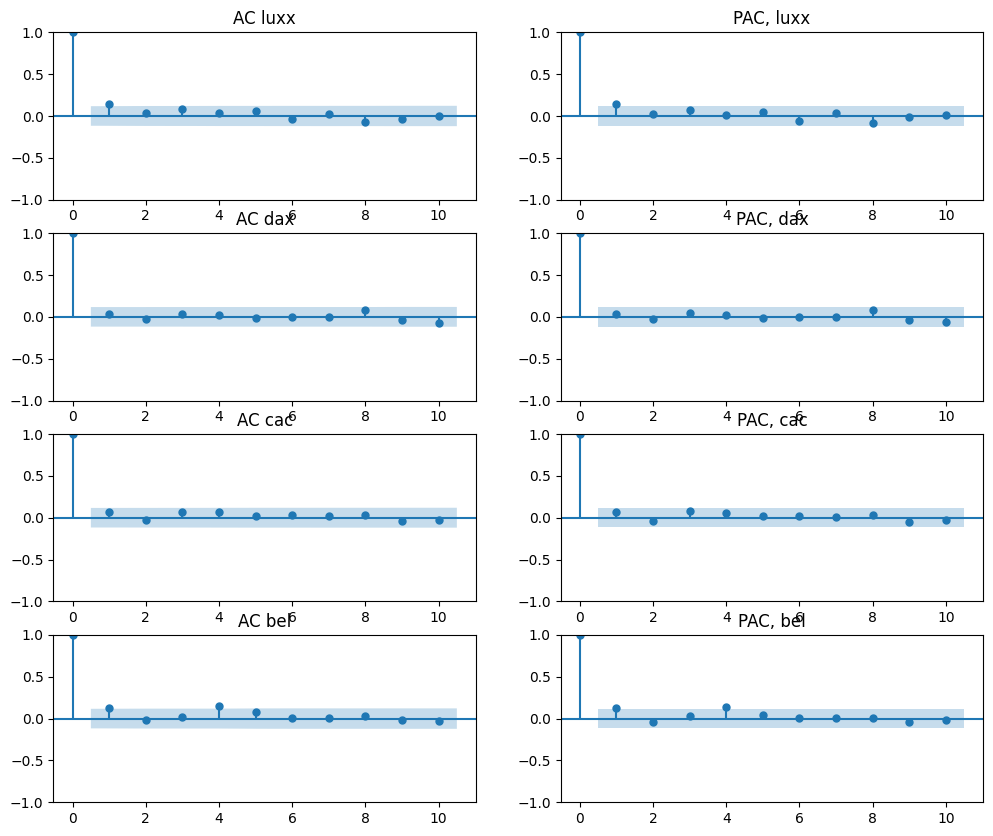

In [15]:
# Dax, Bel and Cac are non-stationary. Luxx is less clear, however, we err on the side of caution and assume it is non-stationary. 

# Difference the series and check for stationarity of differenced series. 
df_diff = pd.DataFrame.pct_change(df.iloc[:,1:])
df_diff['date'] = df['date']
df_diff = df_diff.dropna()

# PLOT SERIES
fig, axs = plt.subplots(2,2, sharex=True,figsize=(12,10))
axs[0,0].plot(df_diff['date'], df_diff['luxx']);
axs[0,0].set_title('luxx');
axs[0,1].plot(df_diff['date'], df_diff['dax']);
axs[0,1].set_title("dax");
axs[1,0].plot(df_diff['date'], df_diff['cac']);
axs[1,0].set_title("cac");
axs[1,1].plot(df_diff['date'], df_diff['bel']);
axs[1,1].set_title("bel");
axs[1,0].tick_params(labelrotation=45)
axs[1,1].tick_params(labelrotation=45)
print("Comment on the figures. Do indexes look stationary? Can you detect common patterns by eyeballing the figures?")

# AC&PAC functions
fig, axs = plt.subplots(4, 2,figsize=(12,10))
# luxx
sm.graphics.tsa.plot_acf(df_diff["luxx"].dropna(), lags=10, ax=axs[0,0]);
axs[0,0].set_title("AC luxx");
sm.graphics.tsa.plot_pacf(df_diff["luxx"].dropna(), lags=10, ax=axs[0,1]);
axs[0,1].set_title("PAC, luxx");
# dax
sm.graphics.tsa.plot_acf(df_diff["dax"].dropna(), lags=10, ax=axs[1,0]);
axs[1,0].set_title("AC dax");
sm.graphics.tsa.plot_pacf(df_diff["dax"].dropna(), lags=10, ax=axs[1,1]);
axs[1,1].set_title("PAC, dax");
# cac
sm.graphics.tsa.plot_acf(df_diff["cac"].dropna(), lags=10, ax=axs[2,0]);
axs[2,0].set_title("AC cac");
sm.graphics.tsa.plot_pacf(df_diff["cac"].dropna(), lags=10, ax=axs[2,1]);
axs[2,1].set_title("PAC, cac");
# bel
sm.graphics.tsa.plot_acf(df_diff["bel"].dropna(), lags=10, ax=axs[3,0]);
axs[3,0].set_title("AC bel");
sm.graphics.tsa.plot_pacf(df_diff["bel"].dropna(), lags=10, ax=axs[3,1]);
axs[3,1].set_title("PAC, bel");
print("All series appear stationary.")






In [16]:
# Stationarity tests - table with probabilities for each test
ur_probs = pd.DataFrame(np.zeros((4,2)))
ur_probs.index = ['dax','bel','luxx','cac']
ur_probs.columns = ['adf_diff','kpss']

# tests
for i in range(0, df_diff.shape[1]-1):
    res = sm.tsa.stattools.adfuller(df_diff.iloc[:,i].dropna(),maxlag=14,regression='c',autolag='AIC');
    ur_probs.iloc[i,0] = res[1]
    res = sm.tsa.stattools.kpss(df_diff.iloc[:,i].dropna(),regression='c',nlags='auto');
    ur_probs.iloc[i,1] = res[1]

display("Table with p-values for Adf_diff (H0:series is UR) and KPSS (H0:series is stat)")
print(ur_probs)
print("It appears that all series are now stationary.")

C:\Users\Ant\AppData\Local\Temp\ipykernel_21404\3965087489.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res = sm.tsa.stattools.kpss(df_diff.iloc[:,i].dropna(),regression='c',nlags='auto');
C:\Users\Ant\AppData\Local\Temp\ipykernel_21404\3965087489.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res = sm.tsa.stattools.kpss(df_diff.iloc[:,i].dropna(),regression='c',nlags='auto');
C:\Users\Ant\AppData\Local\Temp\ipykernel_21404\3965087489.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res = sm.tsa.stattools.kpss(df_diff.iloc[:,i].dropna(),regression='c',nlags='auto');
C:\Users\Ant\AppData\Local\Temp\ipykerne

'Table with p-values for Adf_diff (H0:series is UR) and KPSS (H0:series is stat)'

          adf_diff  kpss
dax   7.283324e-29   0.1
bel   4.238464e-27   0.1
luxx  1.355904e-26   0.1
cac   1.888571e-28   0.1
It appears that all series are now stationary.


In [17]:
# Ex 3 Estimate correlation between Luxx and the remaining indices
print(df_diff[['luxx','dax','bel','cac']].corr())
print("Correlation between Luxx and Cac appears to be particularly high.")

# The fact that cac has the highest correlation with Luxx does not mean that it will be the most helpfull predictor. Why? 
# What if it contains the same information as lags of Luxx? 
# We need to estimate a correlation coefficient that controls for lags of Luxx (since lags of it will be part of the VAR model)



          luxx       dax       bel       cac
luxx  1.000000  0.760561  0.703348  0.760189
dax   0.760561  1.000000  0.764434  0.916198
bel   0.703348  0.764434  1.000000  0.836058
cac   0.760189  0.916198  0.836058  1.000000
Correlation between Luxx and Cac appears to be particularly high.


In [19]:
!pip install pingouin

   ---------------------------------------- 0.0/204.4 kB ? eta -:--:--
   --------------------------------------- 204.4/204.4 kB 12.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------------- ---------------- 0.7/1.2 MB 21.8 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 18.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# !pip install pingouin
import pingouin as pg

# Add lag of Luxx to the data
df_diff['Lluxx'] = df_diff['luxx'].shift(-1)
print(pg.partial_corr(data=df_diff, x='luxx', y='cac', covar='Lluxx'))
print(pg.partial_corr(data=df_diff, x='luxx', y='dax', covar='Lluxx'))
print(pg.partial_corr(data=df_diff, x='luxx', y='bel', covar='Lluxx'))
# once we control for infromation contained in the lags of Luxx, Cac remains the best correlated variable with Luxx, although there is virtually almost no difference between Cac and Dax. 

           n         r       CI95%         p-val
pearson  280  0.751468  [0.7, 0.8]  5.955619e-52
           n         r        CI95%         p-val
pearson  280  0.751064  [0.69, 0.8]  7.227074e-52
           n         r         CI95%         p-val
pearson  280  0.697821  [0.63, 0.75]  4.915346e-42


In [21]:
df

,date,dax,bel,luxx,cac
3,1990-01-01,1822.7,NaN,NaN,1882.88
4,1990-02-01,1809.9,NaN,NaN,1849.68
5,1990-03-01,1968.5,NaN,NaN,1971.79
6,1990-04-01,1813.2,NaN,NaN,2046.46
7,1990-05-01,1844.8,NaN,NaN,2107.51
...,...,...,...,...,...
388,2022-02-01,14461.02,4014.02,1732.7829,6658.83
389,2022-03-01,14414.75,4158.78,1782.3151,6659.87
390,2022-04-01,14097.88,4106.37,1710.4815,6533.77
391,2022-05-01,14388.35,3894.33,1691.5123,6468.8


In [25]:
# Perform Granger causality tests
# YOUR CODE HERE
sm.tsa.stattools.grangercausalitytests(x=df_diff[["luxx", "cac"]].dropna(), maxlag=6, addconst=True);  # H0: Cac does not granger-cause luxx
# YOUR CODE HERE
sm.tsa.stattools.grangercausalitytests(x=df_diff[["cac", "luxx"]].dropna(), maxlag=6, addconst=True);  # H0: Lux does not granger-cause cac
# We see that Cac granger-causes Lux. It is unclear if Luxx  granger-causes Cac. 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3947  , p=0.0120  , df_denom=277, df_num=1
ssr based chi2 test:   chi2=6.4640  , p=0.0110  , df=1
likelihood ratio test: chi2=6.3905  , p=0.0115  , df=1
parameter F test:         F=6.3947  , p=0.0120  , df_denom=277, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6035  , p=0.0108  , df_denom=274, df_num=2
ssr based chi2 test:   chi2=9.3750  , p=0.0092  , df=2
likelihood ratio test: chi2=9.2210  , p=0.0099  , df=2
parameter F test:         F=4.6035  , p=0.0108  , df_denom=274, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6609  , p=0.0485  , df_denom=271, df_num=3
ssr based chi2 test:   chi2=8.1888  , p=0.0423  , df=3
likelihood ratio test: chi2=8.0705  , p=0.0446  , df=3
parameter F test:         F=2.6609  , p=0.0485  , df_denom=271, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2999  , p=0.0592  

In [26]:
# Estimate a VAR model
# Use first IC to gauge the number of lags
# For this reason we change the data into statsmodels calss 'VAR'  
Y = sm.tsa.VAR(df_diff[['luxx','cac']])

# estimate information criteria and print results (constant is included by default)
res = sm.tsa.VAR.select_order(Y, 10)
res.summary()
# information criteria point to differents options: from 0-2 lags. 

c:\Users\Ant\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-12.24,-12.21*,4.839e-06,-12.23
1,-12.27,-12.19,4.680e-06,-12.24*
2,-12.29*,-12.16,4.606e-06*,-12.23
3,-12.26,-12.08,4.725e-06,-12.19
4,-12.27,-12.04,4.669e-06,-12.18
5,-12.25,-11.96,4.771e-06,-12.14
6,-12.24,-11.89,4.846e-06,-12.10
7,-12.22,-11.82,4.949e-06,-12.06
8,-12.23,-11.78,4.864e-06,-12.05
9,-12.22,-11.71,4.934e-06,-12.02


In [15]:
# Since the purpose here is forecasting let us evaluate the models based on pseudo-out-of-sample forecasts. 
# Let's use 90% of the sample to estimata the model parameters and 1-step ahead forecasts.

# Save 10% of the sample to test the forecasts
n_fcs = np.round(0.1*df_diff.shape[0]).astype(int)

# empty place-holder for forecasts
fcs = np.empty((n_fcs,2,))
fcs[:] = np.nan

# declare "training" and "test" data
Y_train = sm.tsa.VAR(Y.y[0:-n_fcs,:])                 # training data
Y_test  = Y.y[Y.y.shape[0]-n_fcs:Y.y.shape[0],:]      # test data        

# declare evaluation measures matrices
rmse = np.empty((2,2,))
rmse[:] = np.nan
mae = np.empty((2,2,))
mae[:] = np.nan
rmspe = np.empty((2,2,))
rmspe[:] = np.nan


for p in range(1, 3):                                 # loop over models: p = [1,2]
    # fit VAR(p) on the training data
    # YOUR CODE HERE
    mdl = Y_train.fit()                 # fit VAR(p)
    for i in range(0,n_fcs):                          # loop for 1-step-ahead forecasts on the last 10% of the data
        # YOUR CODE HERE
        Y_test_i = Y.y[]  # data for one-step-ahead forecast at forecast i
        fcs_i = mdl.forecast()     # produce one-step-ahead forecast
        fcs[i,:] = fcs_i                              # store the forecast
    
    # calculate rmse, rmspe, mae 
    rmse[p-1,0:2] = sm.tools.eval_measures.rmse(Y_test,fcs,0)
    mae[p-1,0:2]  = sm.tools.eval_measures.meanabs(Y_test,fcs,0)
    rmspe[p-1,0:2] = sm.tools.eval_measures.rmspe(Y_test,fcs,0)

print("RMSE")
rmse  = pd.DataFrame(rmse,columns=['Luxx','Cac'], index=['p=1','p=2'])
print(rmse)
print("MAE")
mae  = pd.DataFrame(mae,columns=['Luxx','Cac'], index=['p=1','p=2'])
print(mae)
print("RMSPE")
rmspe  = pd.DataFrame(rmspe,columns=['Luxx','Cac'], index=['p=1','p=2'])
print(rmspe)
# We will rely on RMSE and select p=2. Note that even with p=2 this is a small lag for daily data.

C:\Users\xct385\AppData\Local\Temp\1\ipykernel_8788\4274568638.py:12: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  Y_train = sm.tsa.VAR(Y.y[0:-n_fcs,:])                 # training data
C:\Users\xct385\AppData\Local\Temp\1\ipykernel_8788\4274568638.py:13: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  Y_test  = Y.y[Y.y.shape[0]-n_fcs:Y.y.shape[0],:]      # test data
C:\Users\xct385\AppData\Local\Temp\1\ipykernel_8788\4274568638.py:28: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  Y_test_i = Y.y[0:(Y.y.shape[0]-(n_fcs-i)),:]  # data for one-step-ahead forecast at forecast i
C:\Users\xct385\AppData\Local\Temp\1\ipykernel_8788\4274568638.py:28: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  Y_test_i = Y.y[0:(Y.y.shape[0]-(n_fcs-i)),:]  # data for one-step-ahead forecast at forecast i


RMSE
         Luxx       Cac
p=1  0.085080  0.062189
p=2  0.084545  0.060150
MAE
         Luxx       Cac
p=1  0.056162  0.043868
p=2  0.056075  0.044299
RMSPE
           Luxx        Cac
p=1  317.211812  16.406681
p=2  333.999286  77.376853


In [16]:
# Ex 5: Perform rolling one-step-ahead forecast 
# Let's first move the date into index
# df_diff.index = df.index[1:]
Y = df_diff[['luxx','cac']]
n = Y.shape[0] 
for i in range(0,n_fcs):                          # loop for 1-step-ahead forecasts on the last 10% of the data
    # YOUR CODE HERE
    var_i   = sm.tsa.VAR(          )      # declare var model object
    mdl_i   = var_i.fit(            )                        # fit var model
    fcs_i   = mdl_i.forecast(y=var_i.y, steps=1); # one-step-ahead forecast
    fcs[i,:] = fcs_i                              # store the forecast



c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\xct385\AppData\Local\Temp\1\ipykernel_8788\1463407482.py:10: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  fcs_i   = mdl_i.forecast(y=var_i.y, steps=1); # one-step-ahead forecast
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\xct385\AppData\Local\Temp\1\ipykernel_8788\1463407482.py:10: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  fcs_i   = mdl_i.forecast(y=var_i.y, steps=1); # one-step-ahead forecast
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provide

Do the forecasts seem precise? Not really. But these are stock market predictions which are notoriously difficult to predict.


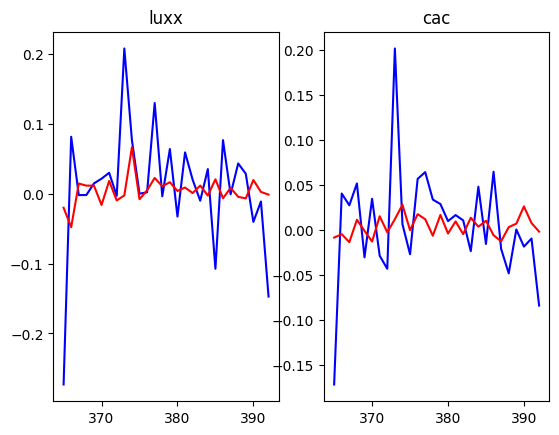

In [17]:
# y corresponding to forecasted values
y_true = df_diff.iloc[n-n_fcs:n+1,df_diff.columns.get_indexer(['luxx','cac'])]
fcs = pd.DataFrame(fcs)
fcs.index = y_true.index
fcs.columns  = y_true.columns

# plot true and forecasted 
fig, axs = plt.subplots(1,2)
axs[0].plot(y_true['luxx'],'b-')
axs[0].plot(fcs['luxx'],'r-')
axs[0].set_title('luxx')
axs[1].plot(y_true['cac'],'b-')
axs[1].plot(fcs['cac'],'r-')
axs[1].set_title('cac')

print("Do the forecasts seem precise? Not really. But these are stock market predictions which are notoriously difficult to predict.")





Check the value of coefficients on the 1st own lag. These are good indicators of the level of persistence in the series.
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 21, Oct, 2024
Time:                     12:03:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.1583
Nobs:                     279.000    HQIC:                  -12.2363
Log likelihood:           932.478    FPE:                4.60443e-06
AIC:                     -12.2885    Det(Omega_mle):     4.44373e-06
--------------------------------------------------------------------
Results for equation luxx
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.002811         0.003868            0.727           0.467
L1.luxx        -0.011545         0.0937

c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


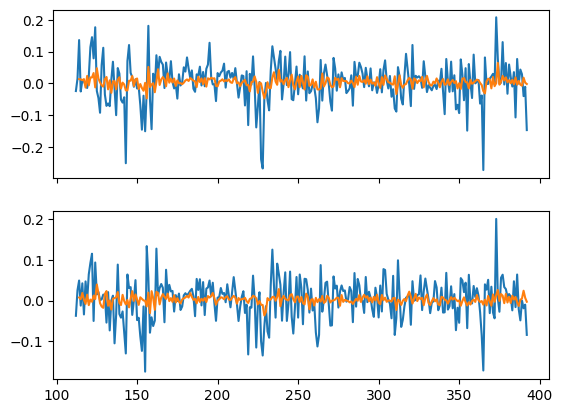

In [18]:
# Let's check the full sample in-sample fit
var_full   = sm.tsa.VAR(Y)
res   = var_full.fit(2)
print("Check the value of coefficients on the 1st own lag. These are good indicators of the level of persistence in the series.")
print(res.summary())


f, axs = plt.subplots(2, sharex=True)
axs[0].plot(Y.index, Y['luxx'])
axs[0].plot(res.fittedvalues.index, res.fittedvalues['luxx'])
axs[1].plot(Y.index, Y['cac'])
axs[1].plot(res.fittedvalues.index, res.fittedvalues['cac'])
